## 0) Loading Data

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.io.arff import loadarff
from scipy.stats import ttest_ind, spearmanr, pearsonr
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold


#Reading the ARFF file
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
df.head()

X = np.array(df.drop('class', axis=1))
y = np.array(df['class'])

skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

## Exercise 1

a)

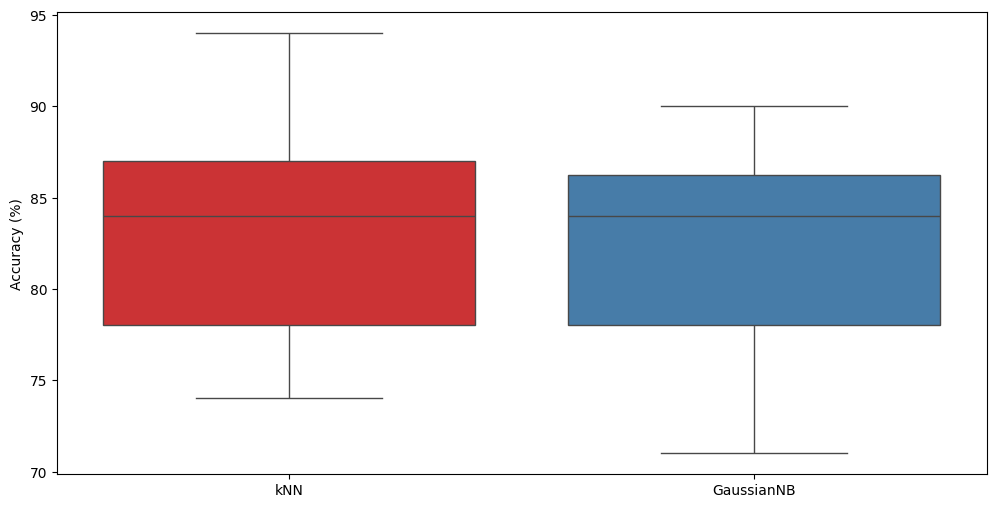

In [15]:
split = skf.split(X, y)
data = {"kNN": [], "GaussianNB": []}

kNN_predictor = KNeighborsClassifier(n_neighbors=5)
Gaussian_predictor = GaussianNB()

for train_index, test_index in split:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    Gaussian_predictor.fit(X_train, y_train)
    kNN_predictor.fit(X_train, y_train)

    kNN_pred = kNN_predictor.predict(X_test)
    kNN_accuracy = metrics.accuracy_score(y_test, kNN_pred)
    data["kNN"].append(round(kNN_accuracy, 2) * 100)

    GaussianNB_pred = Gaussian_predictor.predict(X_test)
    GaussianNB_accuracy = metrics.accuracy_score(y_test, GaussianNB_pred)
    data["GaussianNB"].append(round(GaussianNB_accuracy, 2) * 100)

df = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette="Set1")
plt.ylabel("Accuracy (%)")
plt.show()

b)

In [16]:
p_value = ttest_ind(data["kNN"], data["GaussianNB"]).pvalue

p_value

0.5559851671434339

- To assess the difference in accuracy between both predictors we calculate the p-value.

- Since it is relatively high (greater than 0.05), we reject the hypothesis of kNN being superior to navïve Bayes regarding accuracy.

## Exercise 2

<Axes: >

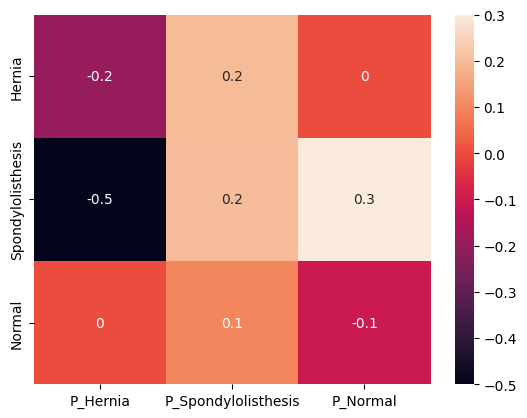

In [17]:
split = skf.split(X, y)
kNN_predictor1 = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
kNN_predictor5 = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')

kNN1_cm = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])
kNN5_cm = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])

for train_index, test_index in split:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    kNN_predictor1.fit(X_train, y_train)
    kNN_predictor5.fit(X_train, y_train)
    
    kNN1_prediction = kNN_predictor1.predict(X_test)

    kNN1_cm += confusion_matrix(y_test, kNN1_prediction)

    kNN5_prediction = kNN_predictor5.predict(X_test)

    kNN5_cm += confusion_matrix(y_test, kNN5_prediction)

kNN1_cm = np.divide(kNN1_cm, 10)
kNN5_cm = np.divide(kNN5_cm, 10)

cm_diff = kNN1_cm - kNN5_cm

confusion = pd.DataFrame(cm_diff, index=['Hernia', 'Spondylolisthesis', 'Normal'], columns=['P_Hernia', 'P_Spondylolisthesis', 'P_Normal'])

sns.heatmap(confusion, annot=True, fmt='g')

- From what we can see, the difference between the two kNN predictors is pretty much zero, which means that increasing the count of nearest neighbors to consider from 1 to 5 made no difference regarding the prediction power of the model.
- This can mean that a significant ammount of the nearest neighbors (in this case 5) don't deviate too much from the closest neighbor.

## Exercise 3

In [21]:
spearmen = spearmanr(X).statistic
print(spearmen)

[[ 1.          0.65315204  0.77849937  0.80082955 -0.26654025  0.67077822]
 [ 0.65315204  1.          0.41874285  0.12405479 -0.00691726  0.39676684]
 [ 0.77849937  0.41874285  1.          0.69280319 -0.13418023  0.68362926]
 [ 0.80082955  0.12405479  0.69280319  1.         -0.36562411  0.5327264 ]
 [-0.26654025 -0.00691726 -0.13418023 -0.36562411  1.         -0.1742733 ]
 [ 0.67077822  0.39676684  0.68362926  0.5327264  -0.1742733   1.        ]]


- Naïve Bayes assumes independence between attributes. This can be a possible difficulty, because from what we can see in the matrix above, most spearman coefficients between all the variables in the dataset are closer to 1 than to 0, meaning most of them are, indeed, dependent.

- TODO - faltam mais duas razões.